In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils import resample

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv("Attri_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2,Life Sciences,1,1,2.0,Female,94,3.0,2,Sales Executive,4.0,Single,5993,19479,8.0,Y,Yes,11,3,1.0,80,0,8,0,1.0,6.0,4,0,5
1,49,No,Travel_Frequently,279.0,Research & Development,NaN,1,Life Sciences,1,2,3.0,Male,61,NaN,2,Research Scientist,2.0,Married,5130,24907,1.0,Y,NaN,23,4,4.0,80,1,10,3,3.0,10.0,7,1,7
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2,Other,1,4,4.0,Male,92,2.0,1,Laboratory Technician,3.0,NaN,2090,2396,6.0,Y,Yes,15,3,2.0,80,0,7,3,3.0,0.0,0,0,0
3,33,No,Travel_Frequently,1392.0,Research & Development,3.0,4,Life Sciences,1,5,4.0,Female,56,3.0,1,Research Scientist,3.0,Married,2909,23159,1.0,Y,Yes,11,3,3.0,80,0,8,3,NaN,NaN,7,3,0
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,1,7,1.0,Male,40,3.0,1,Laboratory Technician,2.0,Married,3468,16632,9.0,Y,No,12,3,4.0,80,1,6,3,3.0,2.0,2,2,2


In [4]:
df.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                    int64
JobInvolvement              float64
JobLevel                      int64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction    float64
StandardHours                 int64
StockOptionLevel            

In [5]:
df.isna().sum()

Age                           0
Attrition                     0
BusinessTravel              204
DailyRate                    73
Department                    0
DistanceFromHome            299
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction     256
Gender                        0
HourlyRate                    0
JobInvolvement              159
JobLevel                      0
JobRole                       0
JobSatisfaction             124
MaritalStatus               126
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          131
Over18                       61
OverTime                    215
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction    178
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance             214
YearsAtC

##### Missing values Imputation

##### For Daily Rate imputing with mean

In [6]:
df["DailyRate"].fillna(df.groupby(["Department","JobRole"])["DailyRate"].transform("mean"), inplace=True)

##### for distance from home imputation

In [7]:
df['DistanceFromHome'].fillna(df["DistanceFromHome"].mean(),inplace=True)

##### for job involvement imputation

In [8]:
df['JobInvolvement'].fillna(df.groupby(["Department"])["JobInvolvement"].agg(pd.Series.mode).iloc[0],inplace=True)

##### For BusinessTravel Imputation

In [9]:
df['BusinessTravel'].fillna(df.groupby(["Department"])["BusinessTravel"].agg(pd.Series.mode).iloc[0],inplace=True)

##### Imputing for environmental satisfaction

In [10]:
df["EnvironmentSatisfaction"].fillna(df.groupby("Gender")["EnvironmentSatisfaction"].agg(pd.Series.mode).iloc[0],inplace=True)

#### imputing for job satisfaction

In [11]:
df["JobSatisfaction"].fillna(df.groupby(["Department","JobRole"])["JobSatisfaction"].agg(pd.Series.mode).iloc[0],inplace=True)

#### imputing for marital status

In [12]:
df["MaritalStatus"].fillna(df.groupby("Gender")["MaritalStatus"].agg(pd.Series.mode).iloc[0],inplace=True)

##### Noofcompaniesworked Imputation

In [13]:
df["NumCompaniesWorked"].fillna(df["NumCompaniesWorked"].mean(),inplace=True)

##### Over18 field imputation

In [14]:
df["Over18"].fillna(df["Over18"].mode().iloc[0],inplace=True)

##### overtime column imputation

In [15]:
df["OverTime"].fillna(df.groupby("JobRole")["OverTime"].agg(pd.Series.mode).iloc[0],inplace=True)

##### RelationshipSatisfaction imputation

In [16]:
df["RelationshipSatisfaction"].fillna(df.groupby("Gender")["RelationshipSatisfaction"].transform("median"),inplace=True)

##### worklifebalance Imputation

In [17]:
df["WorkLifeBalance"].fillna(df["WorkLifeBalance"].median(),inplace=True)

#### Years at company Imputation

In [18]:
df["YearsAtCompany"].fillna(df["YearsAtCompany"].mean(),inplace=True)

In [19]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Imputing Categorical variables with Binary Mapping and dummies

In [20]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

In [21]:
df['BusinessTravel']=df['BusinessTravel'].map({'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0}).astype(int)

In [22]:
EducationField_Cols=pd.get_dummies(df['EducationField'],prefix='Edu_Feild')
df[EducationField_Cols.columns]=EducationField_Cols
df.drop('EducationField',axis=1,inplace=True)

In [23]:
df['Gender']=df["Gender"].map({"Male":1,'Female':0})

In [24]:
marital_Cols=pd.get_dummies(df['MaritalStatus'],prefix='marital')
df[marital_Cols.columns]=marital_Cols
df.drop('MaritalStatus',axis=1,inplace=True)


In [25]:
Role_Cols=pd.get_dummies(df['JobRole'],prefix='Role')
df[Role_Cols.columns]=Role_Cols
df.drop('JobRole',axis=1,inplace=True)

In [26]:
Department_Cols=pd.get_dummies(df['Department'],prefix='Department')
df[Department_Cols.columns]=Department_Cols
df.drop('Department',axis=1,inplace=True)

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Edu_Feild_Human Resources,Edu_Feild_Life Sciences,Edu_Feild_Marketing,Edu_Feild_Medical,Edu_Feild_Other,Edu_Feild_Technical Degree,marital_Divorced,marital_Married,marital_Single,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,2,1102.0,1.000000,2,1,1,2.0,0,94,3.0,2,4.0,5993,19479,8.0,Y,Yes,11,3,1.0,80,0,8,0,1.0,6.000000,4,0,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279.0,9.222886,1,1,2,3.0,1,61,3.0,2,2.0,5130,24907,1.0,Y,No,23,4,4.0,80,1,10,3,3.0,10.000000,7,1,7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373.0,2.000000,2,1,4,4.0,1,92,2.0,1,3.0,2090,2396,6.0,Y,Yes,15,3,2.0,80,0,7,3,3.0,0.000000,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,33,0,1,1392.0,3.000000,4,1,5,4.0,0,56,3.0,1,3.0,2909,23159,1.0,Y,Yes,11,3,3.0,80,0,8,3,3.0,7.036403,7,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591.0,2.000000,1,1,7,1.0,1,40,3.0,1,2.0,3468,16632,9.0,Y,No,12,3,4.0,80,1,6,3,3.0,2.000000,2,2,2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [28]:
df["Over18"]=df["Over18"].map({"Y":1,"N":0})

In [29]:
df["OverTime"]=df["OverTime"].map({"Yes":1,"No":0})

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Edu_Feild_Human Resources,Edu_Feild_Life Sciences,Edu_Feild_Marketing,Edu_Feild_Medical,Edu_Feild_Other,Edu_Feild_Technical Degree,marital_Divorced,marital_Married,marital_Single,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,2,1102.0,1.000000,2,1,1,2.0,0,94,3.0,2,4.0,5993,19479,8.0,1,1,11,3,1.0,80,0,8,0,1.0,6.000000,4,0,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279.0,9.222886,1,1,2,3.0,1,61,3.0,2,2.0,5130,24907,1.0,1,0,23,4,4.0,80,1,10,3,3.0,10.000000,7,1,7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373.0,2.000000,2,1,4,4.0,1,92,2.0,1,3.0,2090,2396,6.0,1,1,15,3,2.0,80,0,7,3,3.0,0.000000,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,33,0,1,1392.0,3.000000,4,1,5,4.0,0,56,3.0,1,3.0,2909,23159,1.0,1,1,11,3,3.0,80,0,8,3,3.0,7.036403,7,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591.0,2.000000,1,1,7,1.0,1,40,3.0,1,2.0,3468,16632,9.0,1,0,12,3,4.0,80,1,6,3,3.0,2.000000,2,2,2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


##### Removing insignificant columns

In [31]:
df.drop(["StandardHours","EmployeeCount","Over18","EmployeeNumber"],axis=1,inplace=True)

# Exploratory Data Analysis

C:\Users\madha\AppData\Anaconda\envs\tf_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attrition', ylabel='count'>

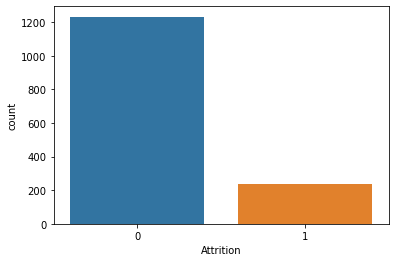

In [32]:
# Distribution of Target variable
sns.countplot(df["Attrition"])

#### Correlarion Map

In [33]:
corr=df.corr()


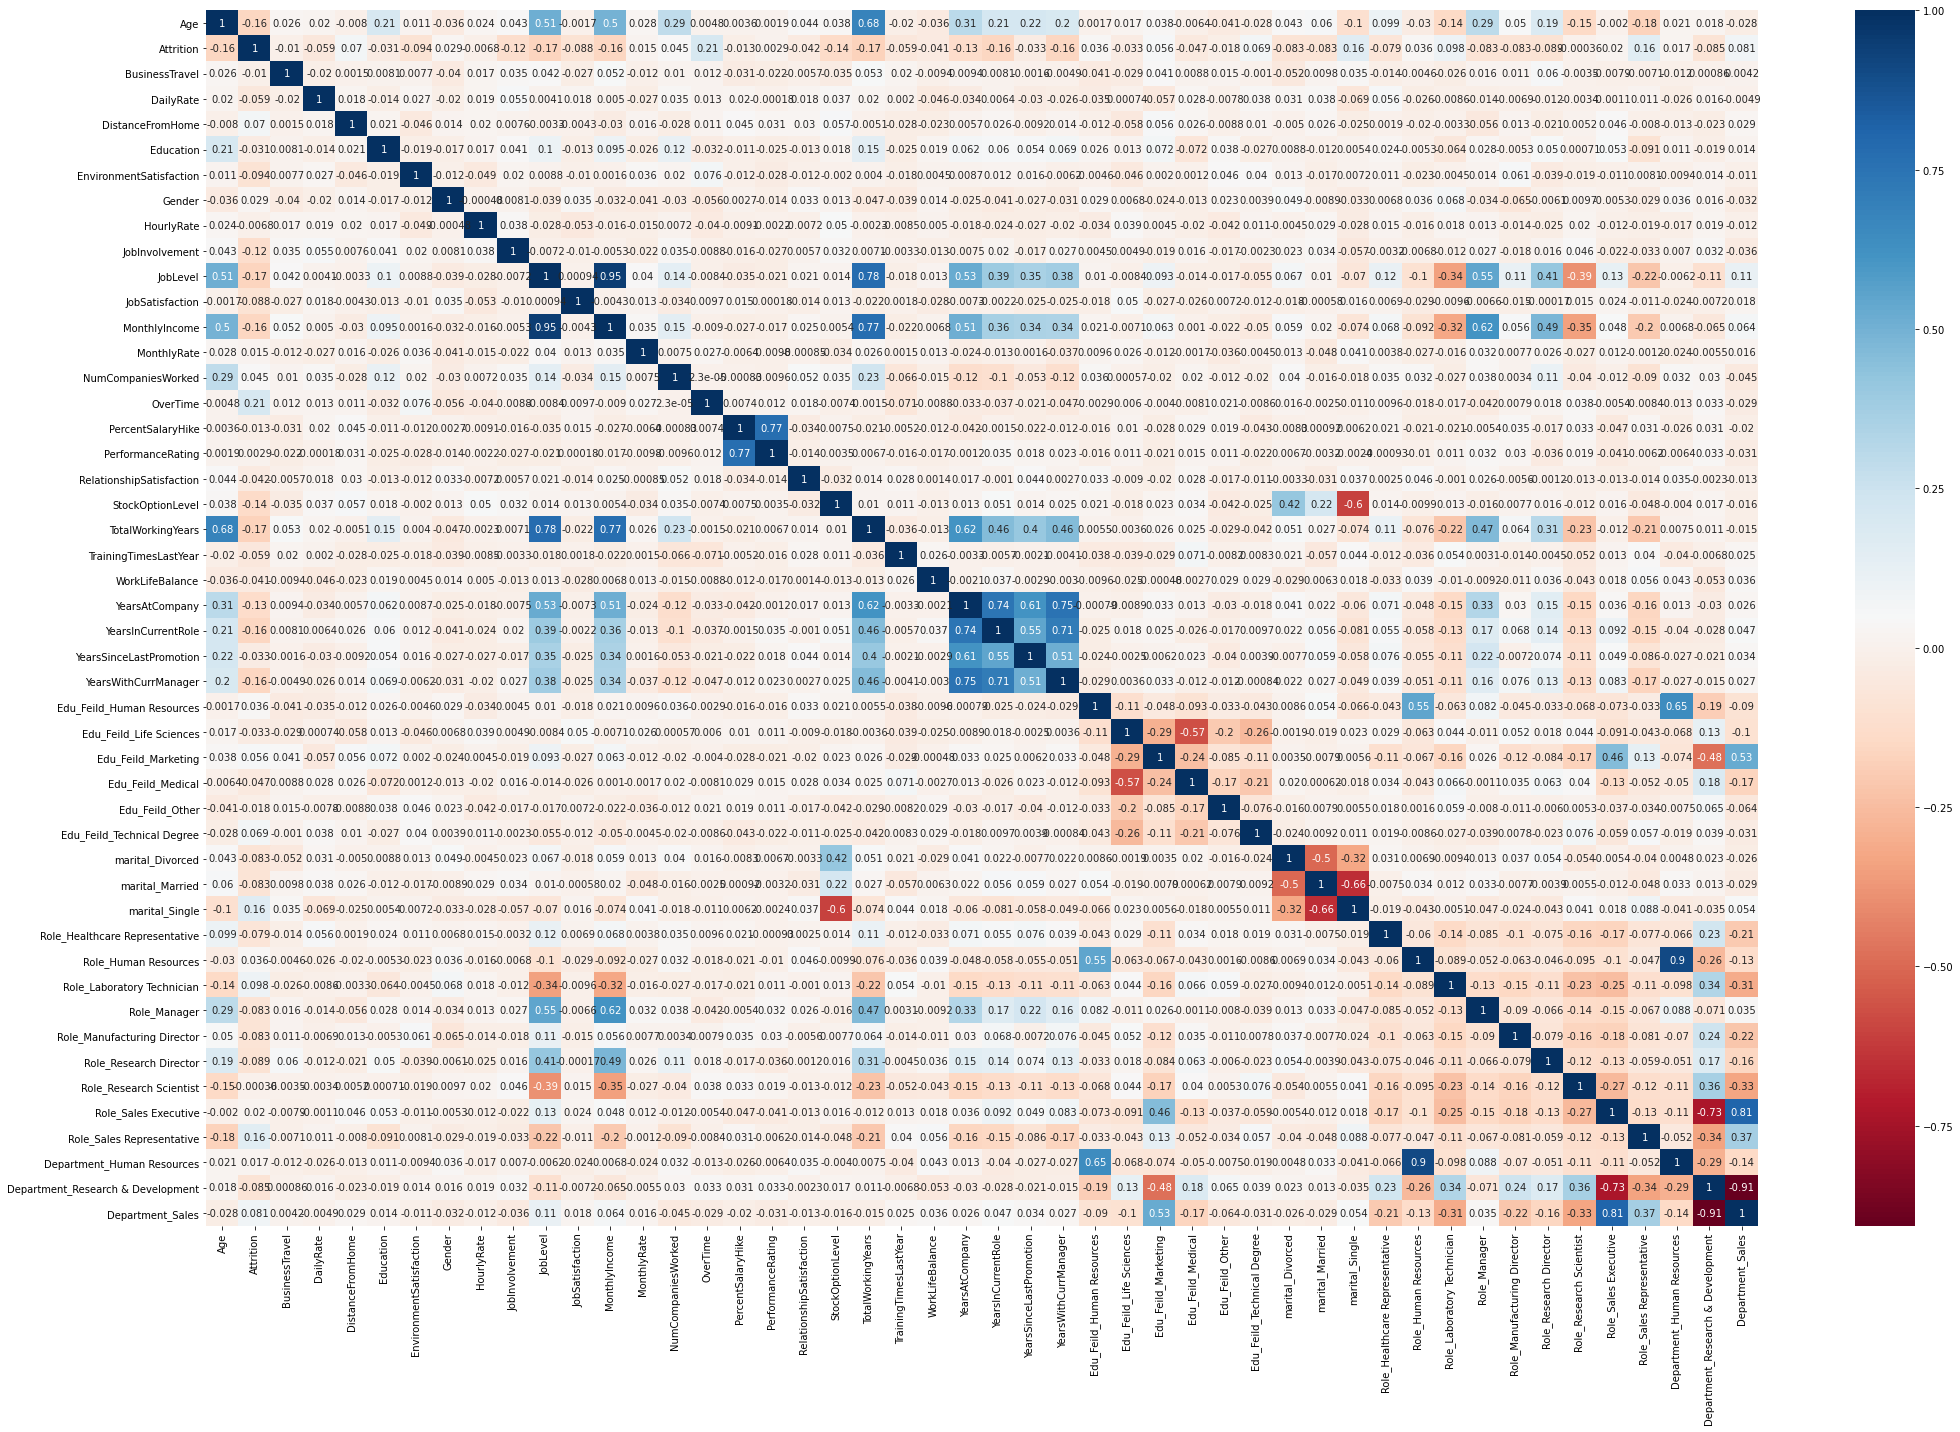

In [34]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.tight_layout()

In [35]:
df_majority = df[df.Attrition==0]
df_minority = df[df.Attrition==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

##### Depandent and Target Varaibles

y=df_upsampled["Attrition"]
x=df_upsampled.drop("Attrition", axis=1)

In [36]:
x.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Edu_Feild_Human Resources,Edu_Feild_Life Sciences,Edu_Feild_Marketing,Edu_Feild_Medical,Edu_Feild_Other,Edu_Feild_Technical Degree,marital_Divorced,marital_Married,marital_Single,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
1,49,1,279.0,9.222886,1,3.0,1,61,3.0,2,2.0,5130,24907,1.0,0,23,4,4.0,1,10,3,3.0,10.000000,7,1,7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,33,1,1392.0,3.000000,4,4.0,0,56,3.0,1,3.0,2909,23159,1.0,1,11,3,3.0,0,8,3,3.0,7.036403,7,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,2,591.0,2.000000,1,1.0,1,40,3.0,1,2.0,3468,16632,9.0,0,12,3,4.0,1,6,3,3.0,2.000000,2,2,2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
5,32,1,1005.0,2.000000,2,4.0,1,79,3.0,1,4.0,3068,11864,0.0,0,13,3,3.0,0,8,2,2.0,7.000000,7,3,6,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
6,59,2,1324.0,3.000000,3,3.0,0,81,4.0,1,1.0,2670,9964,4.0,1,20,4,1.0,3,12,3,2.0,1.000000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


# Scaling Data

In [37]:
scale=StandardScaler()
x[['Age','DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]= scale.fit_transform(x[['Age','DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']])

In [38]:
x.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Edu_Feild_Human Resources,Edu_Feild_Life Sciences,Edu_Feild_Marketing,Edu_Feild_Medical,Edu_Feild_Other,Edu_Feild_Technical Degree,marital_Divorced,marital_Married,marital_Single,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
1,1.361526,1,-1.299311,-0.020116,-1.887176,0.257977,1,-0.243849,0.378667,0.001046,-0.590488,-0.242322,1.463522,-0.708137,0,2.059330,2.278000,1.205754,0.259822,-0.094925,0.195822,0.322092,0.536480,0.820788,-0.348625,0.885096,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,-0.365087,1,1.508437,-0.873896,1.066294,1.255910,0,-0.489397,0.378667,-0.905226,0.331418,-0.720492,1.218671,-0.708137,1,-1.157996,-0.438981,0.238360,-0.891767,-0.352164,0.195822,0.322092,0.044031,0.820788,0.289692,-1.116600,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,-1.012567,2,-0.512234,-1.011096,-1.887176,-1.737889,1,-1.275153,0.378667,-0.905226,-0.590488,-0.600142,0.304402,2.570197,0,-0.889886,-0.438981,1.205754,0.259822,-0.609404,0.195822,0.322092,-0.792848,-0.574568,-0.029466,-0.544687,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
5,-0.473000,1,0.532158,-1.011096,-0.902686,1.255910,1,0.640127,0.378667,-0.905226,1.253324,-0.686260,-0.363475,-1.117929,0,-0.621775,-0.438981,0.238360,-0.891767,-0.352164,-0.589733,-1.182452,0.037982,0.820788,0.289692,0.599139,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
6,2.440659,2,1.336895,-0.873896,0.081804,0.257977,0,0.738347,1.859999,-0.905226,-1.512395,-0.771947,-0.629617,0.521238,1,1.254999,2.278000,-1.696428,2.563001,0.162315,0.195822,-1.182452,-0.959014,-1.132710,-0.667783,-1.116600,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


# Train Test split 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=7,stratify=y)

# KNN Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier

KNNClf=KNeighborsClassifier(2)
KNNClf.fit(X_train,y_train)
KNNPrediction=KNNClf.predict(X_test)

Best score: 0.88


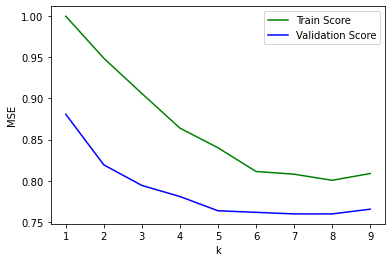

In [41]:
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train, y_train)
    train_score_array.append(knn_clf.score(X_train, y_train))
    score = knn_clf.score(X_test, y_test)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best score: {:.2f}".format(best_score))

In [42]:
# KNN Scores

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,KNNPrediction))
print("\n\n",classification_report(y_test,KNNPrediction))
print("Accuracy: ",accuracy_score(y_test,KNNPrediction))

Confusion Matrix KNN: 
 [[353  17]
 [ 77  73]]


               precision    recall  f1-score   support

           0       0.82      0.95      0.88       370
           1       0.81      0.49      0.61       150

    accuracy                           0.82       520
   macro avg       0.82      0.72      0.75       520
weighted avg       0.82      0.82      0.80       520

Accuracy:  0.8192307692307692


In [43]:
from sklearn.model_selection import cross_val_score
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_train, y_train, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.81147541 0.86885246 0.86065574 0.85950413 0.83471074 0.83471074
 0.88429752 0.83471074 0.89256198 0.89256198]
Average cross-validation score: 0.86


In [44]:
param_grid = dict(leaf_size = list(range(15,25)), n_neighbors = list(range(10,15)), p = [1,2])
grid = GridSearchCV(KNNClf, param_grid, refit = True, verbose = 1, scoring = 'recall') 
grid.fit(x, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'leaf_size': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
                         'n_neighbors': [10, 11, 12, 13, 14], 'p': [1, 2]},
             scoring='recall', verbose=1)

In [45]:
grid.best_params_

{'leaf_size': 15, 'n_neighbors': 11, 'p': 1}

In [46]:
pred = grid.predict(X_test)

#Evaluating
print('Confusion Matrix & Classification Report \n\n',confusion_matrix(y_test,pred),'\n')
print(classification_report(y_test,pred))
print("Accuracy: ",accuracy_score(y_test,pred))

Confusion Matrix & Classification Report 

 [[347  23]
 [ 68  82]] 

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       370
           1       0.78      0.55      0.64       150

    accuracy                           0.82       520
   macro avg       0.81      0.74      0.76       520
weighted avg       0.82      0.82      0.81       520

Accuracy:  0.825


Recall for Normal KNN is less than 0.5 . Hyperparameter tuning improved the recall to 0.55

# Logistic Regression

In [47]:

from sklearn.linear_model import LogisticRegression
penalty = ['l2']
C = [0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)
LogClf=LogisticRegression(random_state=2,max_iter=1500)
LogClf.fit(X_train,y_train)
LogisticPrediction=LogClf.predict(X_test)

In [48]:
#Logistic regression Scores

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,LogisticPrediction))
print("\n\n",classification_report(y_test,LogisticPrediction))


Confusion Matrix KNN: 
 [[333  37]
 [ 76  74]]


               precision    recall  f1-score   support

           0       0.81      0.90      0.85       370
           1       0.67      0.49      0.57       150

    accuracy                           0.78       520
   macro avg       0.74      0.70      0.71       520
weighted avg       0.77      0.78      0.77       520



#### HyperParameter tuning

In [49]:

grid_log = GridSearchCV(LogClf, parameters, refit = True, verbose = 1, scoring = 'recall',n_jobs = -1) 
grid_log.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.9s finished


GridSearchCV(estimator=LogisticRegression(max_iter=1500, random_state=2),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
             scoring='recall', verbose=1)

In [50]:
pred_log=grid_log.predict(X_test)

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,pred_log))
print("\n\n",classification_report(y_test,pred_log))


Confusion Matrix KNN: 
 [[339  31]
 [ 67  83]]


               precision    recall  f1-score   support

           0       0.83      0.92      0.87       370
           1       0.73      0.55      0.63       150

    accuracy                           0.81       520
   macro avg       0.78      0.73      0.75       520
weighted avg       0.80      0.81      0.80       520



#### The recall value for the model was improved by tuning the hyper parameter.

# Decission Tree Algorithm

In [51]:
from sklearn import tree

DecisionTreeClf=tree.DecisionTreeClassifier(random_state=4)
DecisionTreeClf=DecisionTreeClf.fit(X_train,y_train)
DecisionTreeprediction=DecisionTreeClf.predict(X_test)


In [52]:
#Decision tree scores

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,DecisionTreeprediction))
print("\n\n",classification_report(y_test,DecisionTreeprediction))


Confusion Matrix KNN: 
 [[315  55]
 [ 23 127]]


               precision    recall  f1-score   support

           0       0.93      0.85      0.89       370
           1       0.70      0.85      0.77       150

    accuracy                           0.85       520
   macro avg       0.81      0.85      0.83       520
weighted avg       0.86      0.85      0.85       520



# Hyperparameter tuning for Decision tree

In [53]:
param_grid = {"min_samples_split": [2, 5, 10, 20],
              "max_depth": [6, 8, 10, 15],
              "min_samples_leaf": [20, 40, 50],
              "max_leaf_nodes": [5, 30, 40, 100],
              }
grid_decision = GridSearchCV(DecisionTreeClf, param_grid, refit = True, verbose = 1, scoring = 'recall',n_jobs = -1) 
grid_decision.fit(x, y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    3.8s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 15],
                         'max_leaf_nodes': [5, 30, 40, 100],
                         'min_samples_leaf': [20, 40, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='recall', verbose=1)

In [54]:
pred_decision=grid_decision.predict(X_test)


print("Confusion Matrix KNN: \n",confusion_matrix(y_test,pred_decision))
print("\n\n",classification_report(y_test,pred_decision))


Confusion Matrix KNN: 
 [[345  25]
 [ 57  93]]


               precision    recall  f1-score   support

           0       0.86      0.93      0.89       370
           1       0.79      0.62      0.69       150

    accuracy                           0.84       520
   macro avg       0.82      0.78      0.79       520
weighted avg       0.84      0.84      0.84       520



# Linear SVM Classification Algorithm

In [55]:
from sklearn.svm import LinearSVC

SVMCLf=LinearSVC(random_state=6,max_iter=5000)
SVMCLf.fit(X_train,y_train)
SVMPrediction=SVMCLf.predict(X_test)

In [56]:

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,SVMPrediction))
print("\n\n",classification_report(y_test,SVMPrediction))


Confusion Matrix KNN: 
 [[333  37]
 [ 77  73]]


               precision    recall  f1-score   support

           0       0.81      0.90      0.85       370
           1       0.66      0.49      0.56       150

    accuracy                           0.78       520
   macro avg       0.74      0.69      0.71       520
weighted avg       0.77      0.78      0.77       520



#### Hyperparameter tuning

In [57]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100]}
grid_LinearSVC = GridSearchCV(SVMCLf, param_grid,cv=10, refit = True, verbose = 1, scoring = 'recall',n_jobs = -1) 
grid_LinearSVC.fit(x, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.1s finished


GridSearchCV(cv=10, estimator=LinearSVC(max_iter=5000, random_state=6),
             n_jobs=-1, param_grid={'C': [0.1, 0.5, 1, 10, 100]},
             scoring='recall', verbose=1)

In [58]:
pred_LinearSVC=grid_LinearSVC.predict(X_test)

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,pred_LinearSVC))
print("\n\n",classification_report(y_test,pred_LinearSVC))


Confusion Matrix KNN: 
 [[341  29]
 [ 77  73]]


               precision    recall  f1-score   support

           0       0.82      0.92      0.87       370
           1       0.72      0.49      0.58       150

    accuracy                           0.80       520
   macro avg       0.77      0.70      0.72       520
weighted avg       0.79      0.80      0.78       520



# Kernal SVM

In [59]:
from sklearn.svm import SVC

LinearKernalSVC=SVC(kernel="linear",random_state=10)
LinearKernalSVC.fit(X_train,y_train)
LinearKernalSVCPrediction=LinearKernalSVC.predict(X_test)

In [60]:
print("Confusion Matrix KNN: \n",confusion_matrix(y_test,LinearKernalSVCPrediction))
print("\n\n",classification_report(y_test,LinearKernalSVCPrediction))


Confusion Matrix KNN: 
 [[335  35]
 [ 74  76]]


               precision    recall  f1-score   support

           0       0.82      0.91      0.86       370
           1       0.68      0.51      0.58       150

    accuracy                           0.79       520
   macro avg       0.75      0.71      0.72       520
weighted avg       0.78      0.79      0.78       520



#### Hyperparameter tuning

In [61]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100]}
grid_LinearkernalSVC = GridSearchCV(LinearKernalSVC, param_grid, refit = True, verbose = 1, scoring = 'recall') 
grid_LinearkernalSVC.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.2min finished


GridSearchCV(estimator=SVC(kernel='linear', random_state=10),
             param_grid={'C': [0.1, 0.5, 1, 10, 100]}, scoring='recall',
             verbose=1)

In [62]:
pred_SVCLinearKernal=grid_LinearkernalSVC.predict(X_test)

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,pred_SVCLinearKernal))
print("\n\n",classification_report(y_test,pred_SVCLinearKernal))
print(grid_LinearkernalSVC.best_params_)

Confusion Matrix KNN: 
 [[342  28]
 [ 65  85]]


               precision    recall  f1-score   support

           0       0.84      0.92      0.88       370
           1       0.75      0.57      0.65       150

    accuracy                           0.82       520
   macro avg       0.80      0.75      0.76       520
weighted avg       0.81      0.82      0.81       520

{'C': 100}


In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 100)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print(scores)
print("mean of the scores:" , np.mean(scores))

[0.82758621 0.80693069 0.77722772 0.83663366 0.7970297  0.83663366]
mean of the scores: 0.8136736087401845


# Poly Kernal SVM

In [64]:
polykernalsvm=SVC(kernel="poly",random_state=8)
polykernalsvm.fit(X_train,y_train)
polykernalSVM_Prediction=polykernalsvm.predict(X_test)

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,polykernalSVM_Prediction))
print("\n\n",classification_report(y_test,polykernalSVM_Prediction))


Confusion Matrix KNN: 
 [[359  11]
 [ 50 100]]


               precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.90      0.67      0.77       150

    accuracy                           0.88       520
   macro avg       0.89      0.82      0.84       520
weighted avg       0.88      0.88      0.88       520



In [65]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100]}
grid_polykernalSVC = GridSearchCV(polykernalsvm, param_grid, refit = True, verbose = 1, scoring = 'recall') 
grid_polykernalSVC.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.0s finished


GridSearchCV(estimator=SVC(kernel='poly', random_state=8),
             param_grid={'C': [0.1, 0.5, 1, 10, 100]}, scoring='recall',
             verbose=1)

In [66]:
pred_polyKernalSVM=grid_polykernalSVC.predict(X_test)

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,pred_polyKernalSVM))
print("\n\n",classification_report(y_test,pred_polyKernalSVM))
print(grid_polykernalSVC.best_params_)

Confusion Matrix KNN: 
 [[370   0]
 [  0 150]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       150

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520

{'C': 10}


In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'poly',C = 10)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print(scores)
print("mean of the scores:" , np.mean(scores))

[0.86206897 0.88118812 0.85148515 0.88118812 0.88118812 0.9009901 ]
mean of the scores: 0.8763514282462729


# RBF Kernal SVM

In [68]:
RBFkernelSVM=SVC(kernel="rbf", random_state=9)
RBFkernelSVM.fit(X_train,y_train)
RBFKernalSVMPrediction=RBFkernelSVM.predict(X_test)

In [69]:
print("Confusion Matrix KNN: \n",confusion_matrix(y_test,RBFKernalSVMPrediction))
print("\n\n",classification_report(y_test,RBFKernalSVMPrediction))


Confusion Matrix KNN: 
 [[355  15]
 [ 57  93]]


               precision    recall  f1-score   support

           0       0.86      0.96      0.91       370
           1       0.86      0.62      0.72       150

    accuracy                           0.86       520
   macro avg       0.86      0.79      0.81       520
weighted avg       0.86      0.86      0.85       520



In [70]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100]}
grid_rbfkernalSVC = GridSearchCV(RBFkernelSVM, param_grid, refit = True, verbose = 1, scoring = 'recall') 
grid_rbfkernalSVC.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.7s finished


GridSearchCV(estimator=SVC(random_state=9),
             param_grid={'C': [0.1, 0.5, 1, 10, 100]}, scoring='recall',
             verbose=1)

In [71]:
grid_rbfkernalSVC.best_params_

{'C': 100}

In [72]:
pred_rbfkernalSVM=grid_rbfkernalSVC.predict(X_test)

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,pred_rbfkernalSVM))
print("\n\n",classification_report(y_test,pred_rbfkernalSVM))


Confusion Matrix KNN: 
 [[370   0]
 [  0 150]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       150

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520



In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'rbf',C = 100)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print(scores)
print("mean of the scores:" , np.mean(scores))

[0.8817734  0.88613861 0.86633663 0.88613861 0.88613861 0.89108911]
mean of the scores: 0.8829358305288656


# using poly kernel SVC to predict the test data as best fit model

In [74]:
polykernalsvm=SVC(kernel="poly",random_state=8)
polykernalsvm.fit(X_train,y_train)
polykernalSVM_Prediction=polykernalsvm.predict(X_test)

In [75]:
print("Confusion Matrix KNN: \n",confusion_matrix(y_test,polykernalSVM_Prediction))
print("\n\n",classification_report(y_test,polykernalSVM_Prediction))

Confusion Matrix KNN: 
 [[359  11]
 [ 50 100]]


               precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.90      0.67      0.77       150

    accuracy                           0.88       520
   macro avg       0.89      0.82      0.84       520
weighted avg       0.88      0.88      0.88       520



In [76]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100]}
grid_polykernalSVC = GridSearchCV(polykernalsvm, param_grid, refit = True, verbose = 1, scoring = 'recall') 
grid_polykernalSVC.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.3s finished


GridSearchCV(estimator=SVC(kernel='poly', random_state=8),
             param_grid={'C': [0.1, 0.5, 1, 10, 100]}, scoring='recall',
             verbose=1)

In [77]:
pred_polyKernalSVM=grid_polykernalSVC.predict(X_test)

print("Confusion Matrix KNN: \n",confusion_matrix(y_test,pred_polyKernalSVM))
print("\n\n",classification_report(y_test,pred_polyKernalSVM))
print(grid_polykernalSVC.best_params_)

Confusion Matrix KNN: 
 [[370   0]
 [  0 150]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       150

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520

{'C': 10}


#### As Recall is the main factor for our prediction, I feel poly kernel SVM does a good job in predicting for the test data